# Clustering de usuarios de teléfono móvil utilizando PCA

---



Partiendo de las múltiples acciones que realizan los usuarios de los teléfonos móviles como conjunto de datos, utilizaremos un algoritmo de machine learning de **PCA** sobre el conjunto de datos inicial, que tiene un número muy alto de variables, con el objetivo de generar un nuevo conjunto de datos con la dimensionalidad de las variables reducida al máximo posible con la mayor cantidad de datos posibles y obtener los clusters de los usuarios analizando el conjunto de datos reducido. 

### Importar las librerías necesarias y lectura del conjunto de datos

*   En primer lugar, se importan las librerias necesarias de Python para el tratamiento de los datos, generación de gráficas y generación del modelo.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
%matplotlib inline

* En segundo lugar, se realiza la lectura de los ficheros en los que se encuentra el conjunto de datos, En este caso tendremos dos ficheros de entrenamiento y dos ficheros de prueba con extensión .txt y se copiará su contenido en variables de tipo array de numpy utilizando el método ***loadtxt()***.

In [0]:
x_train = np.loadtxt("samsung_train.txt")
x_test = np.loadtxt("samsung_test.txt")
y_train = np.loadtxt("samsung_train_labels.txt")
y_test = np.loadtxt("samsung_test_labels.txt")

* Después visualizamos el tamaño de los datasets. Observamos que los datsets contienen un número muy alto de variables de entrada, en total 561 variables.

In [3]:
print("Tamaño x_train:", x_train.shape)
print("Tamaño x_test :", x_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test :", y_test.shape)

Tamaño x_train: (7352, 561)
Tamaño x_test : (2947, 561)
Tamaño y_train: (7352,)
Tamaño y_test : (2947,)


### Visualización del dataset 

En este ejercicio el dataset de entrenamiento va a ser un array de 7352 observaciones con 561 variables. 

In [4]:
x_train

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

En este ejercicio el dataset de prueba va a ser un array de 2947 observaciones con 561 variables. 

In [5]:
x_test

array([[ 0.25717778, -0.02328523, -0.01465376, ..., -0.72000927,
         0.27680104, -0.0579783 ],
       [ 0.28602671, -0.01316336, -0.11908252, ..., -0.69809082,
         0.28134292, -0.08389801],
       [ 0.27548482, -0.02605042, -0.11815167, ..., -0.70277146,
         0.28008303, -0.0793462 ],
       ...,
       [ 0.34996609,  0.03007744, -0.11578796, ..., -0.65535684,
         0.27447878,  0.18118355],
       [ 0.23759383,  0.01846687, -0.09649893, ..., -0.65971859,
         0.26478161,  0.18756291],
       [ 0.15362719, -0.01843651, -0.13701846, ..., -0.66008023,
         0.26393619,  0.1881034 ]])

### Selección de variables para el modelo

El este ejercicio para obtener nuestra variable x, vamos a unir los datos de entrenamiento y los de prueba utilizando el método ***vstack()*** de numpy.

El este ejercicio para obtener nuestra variable y, vamos a unir los datos de entrenamiento y los de prueba utilizando el método ***hstack()*** de numpy.

In [0]:
x = np.vstack([x_train, x_test])
y = np.hstack([y_train, y_test])

### Generación del modelo

Inicializamos el modelo llamando a una instancia de ***PCA()*** de la librería ***sklearn***. Configuramos el algoritmo para obtener un 90% de los datos originales.

Llamando al método **fit()** en la instancia del modelo y pasando por parámetro al método el dataset completo, el algoritmo entrena y genera nuestro modelo.


In [7]:
modeloPCA = PCA(n_components=0.9).fit(x)
x_pca = modeloPCA.transform(x)
x_pca

array([[-5.53785768, -0.71634549, -1.41254583, ...,  0.04549212,
        -0.59757054, -0.68546532],
       [-5.56417367, -0.57950618, -1.82791155, ..., -0.25336048,
         0.12815314,  0.24352626],
       [-5.4993195 , -0.2976842 , -2.14815192, ..., -0.33063446,
        -0.533514  ,  0.01031801],
       ...,
       [ 4.53658436, -0.99400628,  0.47996958, ...,  0.3547827 ,
        -0.56079677,  0.4447357 ],
       [ 3.74457626, -1.27695066,  0.36737918, ...,  0.53364379,
        -0.27592423, -0.09605838],
       [ 3.96931813, -1.04884643,  0.23966739, ...,  0.37190554,
         0.10424423, -0.02695607]])

### Reduccción de dimensionalidad

El objetivo de PCA es reducir la dimensionalidad del dataset inicial, eso implica perder un porcentaje del dataset inicial, en nuestro caso ha sido un 10%, sin embargo habremos optimizado nuestro dataset con el menor número de variables posibles que contenga la mayor información posible para generar un modelo.

Averiguando el tamaño de nuestro dataset generado por PCA, observamos que hemos pasado de 561 variables a 36 variables. Lo que significa que en estas 36 variables tenemos el 90% de la información del dataset inicial.

In [8]:
x_pca.shape

(10299, 36)

### Porcentaje de varianza en las variables

La cantidad de información o varianza del dataset inicial, en nuestro nuevo dataset es el 90%. Ese porcentaje se encuentra repartido en las nuevas variables resultantes al reducir la dimensionalidad. 

Utilizando el atributo ***explained_variance_ratio_*** podemos visualizar el porcentaje de varianza que hay en cada variable del nuevo dataset.

In [9]:
var_total = 0
for i in range(x_pca.shape[1]):
  print("Varianza variable",i,": ",modeloPCA.explained_variance_ratio_[i])
  var_total += modeloPCA.explained_variance_ratio_[i]
print("Total varianza:", var_total)

Varianza variable 0 :  0.6222706941592161
Varianza variable 1 :  0.04772594629438665
Varianza variable 2 :  0.040181914441435436
Varianza variable 3 :  0.018231985295440636
Varianza variable 4 :  0.01611044678556542
Varianza variable 5 :  0.012018210881137964
Varianza variable 6 :  0.011870031341354448
Varianza variable 7 :  0.010762368364820503
Varianza variable 8 :  0.009607519777803653
Varianza variable 9 :  0.00887132976736044
Varianza variable 10 :  0.00843197754648808
Varianza variable 11 :  0.006777056728605211
Varianza variable 12 :  0.006439049239996803
Varianza variable 13 :  0.005759054709971241
Varianza variable 14 :  0.005219544462505605
Varianza variable 15 :  0.005094555409196231
Varianza variable 16 :  0.004717232674933415
Varianza variable 17 :  0.004473799565429152
Varianza variable 18 :  0.004336190469279218
Varianza variable 19 :  0.0041296248843484245
Varianza variable 20 :  0.004098134506430078
Varianza variable 21 :  0.0038860814126219986
Varianza variable 22 :  

### Visualización de los clusters

Finalmente podemos visualizar en una gráfica que hay dos clusters claramente definidos. La gráfica muestra las dos variables con mayor número de varianza del conjunto de datos.

* El primer cluster se aprecia en colores amarillo y verde claro.
* El segundo cluster se aprecia en colores azul y violeta.

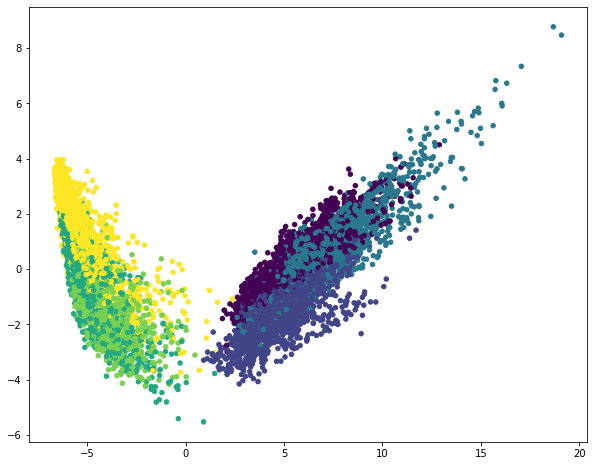

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, s=20, cmap='viridis');